In [208]:
# Testing the law of large numbers
# Script that
# 1) Creates N random normally disributed numbers with mean =0 and stdev =1
# 2) Count how many of these numbers fall within (-1;1)
# 3) Divide the count by N numbers
# 4) Compare to the expected outcome for normal distributions of 68.2%

In [209]:
import numpy as np
from numpy.random import randn


In [210]:
# How many fall within the range (-1;1)?
def func1(N):
    counter=0
    for i in randn(N):
     if -1<i<1:
        counter+=1
    return counter/N


In [211]:
Dataset = [[0]*2]*len(range(100,1050,50))

In [212]:
for i in range(len(Dataset[:])):
    n=list(range(100,1050,50))[i]
    Dataset[i] = [n,func1(n)]

In [213]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd

In [214]:
#np.linspace(0,100, num=21)

In [215]:
df=pd.DataFrame(Dataset)
df.columns=['n','Percentage']

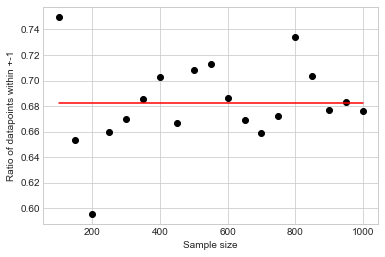

In [216]:
plt.plot(df['n'],df['Percentage'], 'o', color='black')
plt.plot(list(range(100,1050,50)), [0.682]*len(Dataset[:]), color='red')
plt.xlabel('Sample size')
plt.ylabel('Ratio of datapoints within +-1')
plt.show()

In [217]:
# Exercise 2: Balance sheet analysis
# Data
revenue = [14574.49, 7606.46, 8611.41, 9175.41, 8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97, 15433.50]
expenses = [12051.82, 5695.07, 12319.20, 12089.72, 8658.57, 840.20, 3285.73, 5821.12, 6976.93, 16618.61, 10054.37, 3803.96]
# Task:
# 1) Profit for each month
# 2) After-tax profit for each month (tax rate 30%)
# 3) Net profit margin for each month
# 4) Good months (after-tax profit greater than mean)
# 5) Bad months (after-tax profit less than mean)
# 6) The best month (after-tax profit max)
# 7) The worst month (after-tax profit min)

# Results to be as lists
# Dollar values calculated at precision $.01 but presented at $1K precision
# Margin presented as % with 0 decimal points
# Negative tax is a deferred tax asset

In [242]:
# Profit for each month
profit=[]
tax_rate=0.3
tax=[]
at_profit=[]
net_margin=[]
from statistics import mean
good=[]
bad=[]
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct','Nov','Dec']

for i, value in enumerate(revenue):
    # Pre-tax profit
    profit.append((revenue[i]-expenses[i]))
    # Rounding
    profit[i]=round(profit[i],2)
    # Tax
    tax.append(profit[i]*tax_rate)
    # After-tax profit
    at_profit.append(profit[i]-tax[i])
    # Net margin
    net_margin.append(round(at_profit[i]/revenue[i]*100,0
                            ))
    # Good and bad months
    if at_profit[i]>=mean(at_profit):
        good.append(True)
        bad.append(False)
    else: 
        good.append(False)
        bad.append(True)
    # Best month

    

In [236]:
max_amt=max(at_profit)
max_mon=months[at_profit.index(max_amt)]

f"The most profitable month was {max_mon} with $ {round(max_amt,0)} K."


'The most profitable month is Dec with $ 8141.0 K.'

In [237]:
min_amt=min(at_profit)
min_mon=months[at_profit.index(min_amt)]

f"The least profitable month was {min_mon} with $ {round(min_amt,0)} K."

'The least profitable month is Mar with $ -2595.0 K.'

In [277]:
[f'$ {x:.0f}k' for x in at_profit]

['$ 1766k',
 '$ 1338k',
 '$ -2595k',
 '$ -2040k',
 '$ -420k',
 '$ 5086k',
 '$ 5747k',
 '$ 2761k',
 '$ 2330k',
 '$ -1567k',
 '$ 462k',
 '$ 8141k']

In [269]:
for i, val in enumerate(months):
    if at_profit[i]>=mean(at_profit):
        print(val)
#[f"Good months were {val}" for i, val in enumerate(months): if at_profit[i]>=mean(at_profit): print(val)]

Jan
Jun
Jul
Aug
Sep
Dec


In [ ]:
f"Monthly profits are as follows: {*profit,}."

'Monthly profits are as follows: (2522.67, 1911.39, -3707.79, -2914.31, -599.92, 7265.24, 8210.55, 3944.97, 3328.39, -2238.65, 659.6, 11629.54).'

In [256]:
f"After-tax profit is : {*at_profit,}."

'After-tax profit is : (1765.8690000000001, 1337.973, -2595.453, -2040.0169999999998, -419.94399999999996, 5085.668, 5747.385, 2761.479, 2329.873, -1567.055, 461.72, 8140.678000000001).'

In [ ]:
f"Revenues: {*at_profit,}."

'Revenues: (1765.8690000000001,).'

In [ ]:
f"Monthly profit margins are as follows: {*net_margin,}."

'Monthly profit margins are as follows: (12.0, 18.0, -30.0, -22.0, -5.0, 63.0, 50.0, 28.0, 23.0, -11.0, 4.0, 53.0).'

In [ ]:
f"Good months: {*good,}."